In [1]:
import yt

yt : [INFO     ] 2022-04-29 15:09:26,701 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-04-29 15:09:26,704 Parameters: domain_dimensions         = [50  1  1]
yt : [INFO     ] 2022-04-29 15:09:26,706 Parameters: domain_left_edge          = [-4.  0.  0.]
yt : [INFO     ] 2022-04-29 15:09:26,708 Parameters: domain_right_edge         = [4. 1. 1.]
yt : [INFO     ] 2022-04-29 15:09:26,710 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-04-29 15:09:26,876 Parameters: current_time              = 2.0
yt : [INFO     ] 2022-04-29 15:09:26,877 Parameters: domain_dimensions         = [50  1  1]
yt : [INFO     ] 2022-04-29 15:09:26,879 Parameters: domain_left_edge          = [-4.  0.  0.]
yt : [INFO     ] 2022-04-29 15:09:26,881 Parameters: domain_right_edge         = [4. 1. 1.]
yt : [INFO     ] 2022-04-29 15:09:26,883 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-04-29 15:09:26,994 Parameters: current_time              = 2.0
yt : [INFO     ] 2022

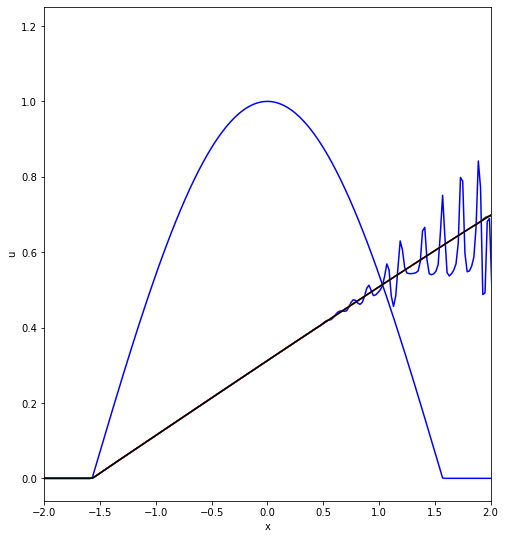

In [14]:
import matplotlib

matplotlib.use("Agg")
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import yt

n = "0100"
ds1 = yt.load("nonlin_adv_diff_minmod_0000.dat", unit_system="code")
ds2 = yt.load("nonlin_adv_diff_minmod_" + n + ".dat", unit_system="code")
ds3 = yt.load("nonlin_adv_diff_woodward_" + n + ".dat", unit_system="code")
ds4 = yt.load("nonlin_adv_diff_cada3_" + n + ".dat", unit_system="code")
ds5 = yt.load("nonlin_adv_diff_weno7_" + n + ".dat", unit_system="code")
_, c1 = ds1.find_max("u")
_, c2 = ds2.find_max("u")
_, c3 = ds3.find_max("u")
_, c4 = ds4.find_max("u")
_, c5 = ds5.find_max("u")
ax = 0  # take a line cut along the x axis

# cutting through the y0,z0 such that we hit the max density
ray1 = ds1.ortho_ray(ax, (c1[1], c1[2]))
ray2 = ds2.ortho_ray(ax, (c2[1], c2[2]))
ray3 = ds3.ortho_ray(ax, (c3[1], c3[2]))
ray4 = ds4.ortho_ray(ax, (c4[1], c4[2]))
ray5 = ds5.ortho_ray(ax, (c5[1], c5[2]))

# Sort the ray values by 'x' so there are no discontinuities
# in the line plot
srt1 = np.argsort(ray1["index", "x"])
srt2 = np.argsort(ray2["index", "x"])
srt3 = np.argsort(ray3["index", "x"])
srt4 = np.argsort(ray4["index", "x"])
srt5 = np.argsort(ray5["index", "x"])

plt.figure(figsize=(8,20))
plt.subplot(211)
plt.plot(np.array(ray1["index", "x"][srt1]), np.array(ray1["u"][srt1]), 'b')
plt.plot(np.array(ray5["index", "x"][srt5]), np.array(ray5["u"][srt5]), 'b', label='Weno7')
plt.plot(np.array(ray4["index", "x"][srt4]), np.array(ray4["u"][srt4]), 'g', label='Cada3')
plt.plot(np.array(ray3["index", "x"][srt3]), np.array(ray3["u"][srt3]), 'r', label='Woodward')
plt.plot(np.array(ray2["index", "x"][srt2]), np.array(ray2["u"][srt2]), 'k', label='Minmod')
plt.xlim(-2, 2)
plt.xlabel("x")
plt.ylabel("u")
#plt.legend(loc='upper left')

plt.savefig("begin.png")
#plt.savefig("limiters.png")

yt : [INFO     ] 2022-05-24 10:22:57,106 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-05-24 10:22:57,108 Parameters: domain_dimensions         = [120   1   1]
yt : [INFO     ] 2022-05-24 10:22:57,110 Parameters: domain_left_edge          = [-4.  0.  0.]
yt : [INFO     ] 2022-05-24 10:22:57,112 Parameters: domain_right_edge         = [4. 1. 1.]
yt : [INFO     ] 2022-05-24 10:22:57,113 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2022-05-24 10:22:57,138 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2022-05-24 10:22:57,735 max value is 1.00000e+00 at -0.7958333333333335 0.5000000000000000 0.5000000000000000


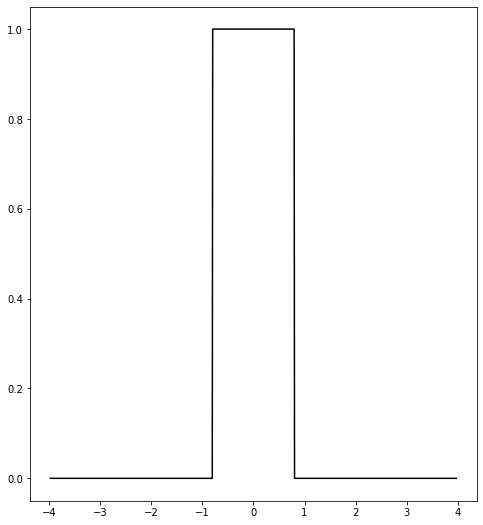

In [1]:
import matplotlib

matplotlib.use("Agg")
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import yt

ds = yt.load("pure_adv_nolimit0001.dat", unit_system="code")
_, c = ds.find_max("u")
ax = 0  # take a line cut along the x axis

# cutting through the y0,z0 such that we hit the max density
ray = ds.ortho_ray(ax, (c[1], c[2]))

# Sort the ray values by 'x' so there are no discontinuities
# in the line plot
srt = np.argsort(ray["index", "x"])

plt.figure(figsize=(8,20))
plt.subplot(211)
plt.plot(np.array(ray["index", "x"][srt]), np.array(ray["u"][srt]), 'k')
#plt.xlim(-2, 2)
#plt.xlabel("x")
#plt.ylabel("u")
#plt.legend(loc='upper left')

In [10]:
#ds.covering_grid() #Data in matrix uit dat file halen
for n in range(0,1,1):
    name = "nonlin_adv_diff_00" + str(n) + "0.dat"
    ds = yt.load(name, unit_system="code")
    p = yt.LinePlot(ds, "u", (0.0, 0.0, 0.0), (10.0, 1.0, 1.0), 120)
    p.set_log("u", False)
    p.show()

FileNotFoundError: No such file or directory: 'nonlin_adv_diff_0000.dat'.
(Also tried 'c:\Users\gebruiker\codes\amrvac\tests\ard\no_reac_1d\output\nonlin_adv_diff_0000.dat').

yt : [INFO     ] 2022-04-30 13:16:30,611 Parameters: current_time              = 2.0
yt : [INFO     ] 2022-04-30 13:16:30,612 Parameters: domain_dimensions         = [50  1  1]
yt : [INFO     ] 2022-04-30 13:16:30,614 Parameters: domain_left_edge          = [-4.  0.  0.]
yt : [INFO     ] 2022-04-30 13:16:30,616 Parameters: domain_right_edge         = [4. 1. 1.]
yt : [INFO     ] 2022-04-30 13:16:30,617 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-04-30 13:16:30,734 Parameters: current_time              = 2.0
yt : [INFO     ] 2022-04-30 13:16:30,735 Parameters: domain_dimensions         = [40  1  1]
yt : [INFO     ] 2022-04-30 13:16:30,739 Parameters: domain_left_edge          = [-4.  0.  0.]
yt : [INFO     ] 2022-04-30 13:16:30,742 Parameters: domain_right_edge         = [4. 1. 1.]
yt : [INFO     ] 2022-04-30 13:16:30,744 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2022-04-30 13:16:30,790 e not found and no parfile passed, can not set thermal_pressure.


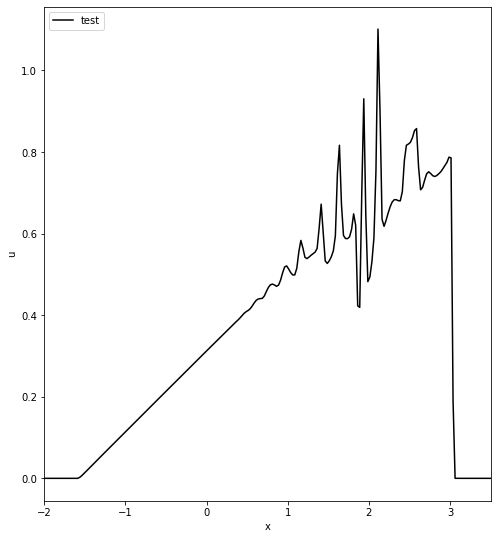

In [37]:
import matplotlib

matplotlib.use("Agg")
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import yt

n = "0100"
ds1 = yt.load("nonlin_adv_diff_weno7_" + n + ".dat", unit_system="code")
ds2 = yt.load("nonlin_adv_diff_test_" + n + ".dat", unit_system="code")
_, c1 = ds1.find_max("u")
_, c2 = ds2.find_max("u")
ax = 0  # take a line cut along the x axis

# cutting through the y0,z0 such that we hit the max density
ray1 = ds1.ortho_ray(ax, (c1[1], c1[2]))
ray2 = ds2.ortho_ray(ax, (c2[1], c2[2]))

# Sort the ray values by 'x' so there are no discontinuities
# in the line plot
srt1 = np.argsort(ray1["index", "x"])
srt2 = np.argsort(ray2["index", "x"])

plt.figure(figsize=(8,20))
plt.subplot(211)
#plt.plot(np.array(ray1["index", "x"][srt1]), np.array(ray1["u"][srt1]), 'b', label='weno7')
plt.plot(np.array(ray2["index", "x"][srt2]), np.array(ray2["u"][srt2]), 'k', label='test')
plt.xlim(-2, 3.5)
plt.xlabel("x")
plt.ylabel("u")
plt.legend(loc='upper left')

#plt.savefig("begin.png")
#plt.savefig("limiters.png")

yt : [INFO     ] 2022-06-08 04:18:10,688 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-06-08 04:18:10,690 Parameters: domain_dimensions         = [1024    1    1]
yt : [INFO     ] 2022-06-08 04:18:10,692 Parameters: domain_left_edge          = [-20.   0.   0.]
yt : [INFO     ] 2022-06-08 04:18:10,695 Parameters: domain_right_edge         = [20.  1.  1.]
yt : [INFO     ] 2022-06-08 04:18:10,697 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-06-08 04:18:10,816 Parameters: current_time              = 2.0
yt : [INFO     ] 2022-06-08 04:18:10,817 Parameters: domain_dimensions         = [1024    1    1]
yt : [INFO     ] 2022-06-08 04:18:10,819 Parameters: domain_left_edge          = [-20.   0.   0.]
yt : [INFO     ] 2022-06-08 04:18:10,820 Parameters: domain_right_edge         = [20.  1.  1.]
yt : [INFO     ] 2022-06-08 04:18:10,821 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-06-08 04:18:10,950 Parameters: current_time              = 5

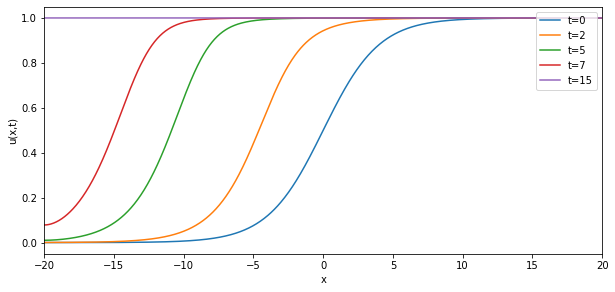

In [39]:
import matplotlib

matplotlib.use("Agg")
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import yt

ds1 = yt.load("analyt22_0000.dat", unit_system="code")
ds2 = yt.load("analyt22_0002.dat", unit_system="code")
ds3 = yt.load("analyt22_0005.dat", unit_system="code")
ds4 = yt.load("analyt22_0007.dat", unit_system="code")
ds5 = yt.load("analyt22_0015.dat", unit_system="code")
_, c1 = ds1.find_max("u")
_, c2 = ds2.find_max("u")
_, c3 = ds3.find_max("u")
_, c4 = ds4.find_max("u")
_, c5 = ds5.find_max("u")
ax = 0  # take a line cut along the x axis

# cutting through the y0,z0 such that we hit the max density
ray1 = ds1.ortho_ray(ax, (c1[1], c1[2]))
ray2 = ds2.ortho_ray(ax, (c2[1], c2[2]))
ray3 = ds3.ortho_ray(ax, (c3[1], c3[2]))
ray4 = ds4.ortho_ray(ax, (c4[1], c4[2]))
ray5 = ds5.ortho_ray(ax, (c5[1], c5[2]))

# Sort the ray values by 'x' so there are no discontinuities
# in the line plot
srt1 = np.argsort(ray1["index", "x"])
srt2 = np.argsort(ray2["index", "x"])
srt3 = np.argsort(ray3["index", "x"])
srt4 = np.argsort(ray4["index", "x"])
srt5 = np.argsort(ray5["index", "x"])

plt.figure(figsize=(10,10))
plt.subplot(211)
plt.plot(np.array(ray1["index", "x"][srt1]), np.array(ray1["u"][srt1]), label='t=0')
plt.plot(np.array(ray2["index", "x"][srt2]), np.array(ray2["u"][srt2]), label='t=2')
plt.plot(np.array(ray3["index", "x"][srt3]), np.array(ray3["u"][srt3]), label='t=5')
plt.plot(np.array(ray4["index", "x"][srt4]), np.array(ray4["u"][srt4]), label='t=7')
plt.plot(np.array(ray5["index", "x"][srt5]), np.array(ray5["u"][srt5]), label='t=15')
plt.xlim(-20, 20)
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.legend(loc='upper right')

#plt.savefig("inviscid_burgers.png")

In [46]:
import matplotlib

matplotlib.use("Agg")
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import yt


t = "07"
ds1 = yt.load("analyt22_00" + t + ".dat", unit_system="code")
_, c1 = ds1.find_max("u")
ax = 0  # take a line cut along the x axis

# cutting through the y0,z0 such that we hit the max density
ray1 = ds1.ortho_ray(ax, (c1[1], c1[2]))

# Sort the ray values by 'x' so there are no discontinuities
# in the line plot
srt1 = np.argsort(ray1["index", "x"])

xen = np.array(ray1["index", "x"][srt1])
uen = np.array(ray1["u"][srt1])
t = float(int(t))
exact = (1.0/2.0) + (1.0/2.0) * np.tanh((1.0/4.0)*(xen + (5.0/4.0)*t))
l = len(uen)
#print(uen)

print((sum((uen-exact)**2)/l)**0.5)





yt : [INFO     ] 2022-06-08 04:21:43,934 Parameters: current_time              = 7.0
yt : [INFO     ] 2022-06-08 04:21:43,935 Parameters: domain_dimensions         = [1024    1    1]
yt : [INFO     ] 2022-06-08 04:21:43,937 Parameters: domain_left_edge          = [-20.   0.   0.]
yt : [INFO     ] 2022-06-08 04:21:43,938 Parameters: domain_right_edge         = [20.  1.  1.]
yt : [INFO     ] 2022-06-08 04:21:43,940 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2022-06-08 04:21:43,975 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2022-06-08 04:21:44,477 max value is 1.00000e+00 at 19.3554687500000000 0.5000000000000000 0.5000000000000000


0.28488252575281847
